In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


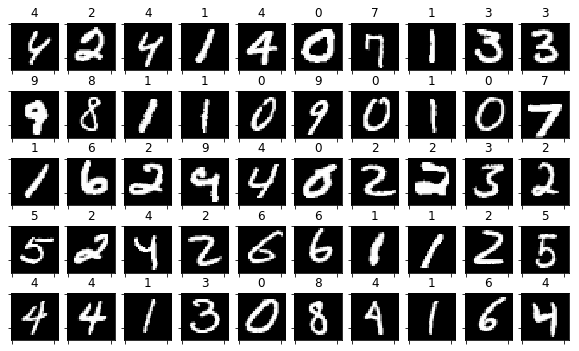

In [3]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Autoencoder for compression

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=.2)

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session

In [6]:
def get_model_A(input_dim, hidden_size, code_size):
    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation='relu', input_dim=input_dim))
    model.add(Dense(code_size, activation='relu'))
    model.add(Dense(hidden_size, activation='relu'))
    model.add(Dense(input_dim, activation='sigmoid'))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.reset_states()
    return model

porqué sigmoide en la última capa. qué pasaría si ponemos tanh o linear

In [7]:
model = get_model_A(input_dim=X.shape[1], hidden_size=256, code_size=24)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                6168      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6400      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               201488    
Total params: 415,016
Trainable params: 415,016
Non-trainable params: 0
_________________________________________________________________


try with larger layer, try with more layers

In [8]:
model.fit(X_train, X_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1200/1200 [==============================] - 0s 336us/sample - loss: 0.1109
Epoch 2/100
1200/1200 [==============================] - 0s 142us/sample - loss: 0.0677
Epoch 3/100
1200/1200 [==============================] - 0s 153us/sample - loss: 0.0552
Epoch 4/100
1200/1200 [==============================] - 0s 151us/sample - loss: 0.0454
Epoch 5/100
1200/1200 [==============================] - 0s 152us/sample - loss: 0.0392
Epoch 6/100
1200/1200 [==============================] - 0s 156us/sample - loss: 0.0351
Epoch 7/100
1200/1200 [==============================] - 0s 152us/sample - loss: 0.0319
Epoch 8/100
1200/1200 [==============================] - 0s 151us/sample - loss: 0.0288
Epoch 9/100
1200/1200 [==============================] - 0s 171us/sample - loss: 0.0261
Epoch 10/100
1200/1200 [==============================] - 0s 156us/sample - loss: 0.0241
Epoch 11/100
1200/1200 [==============================] - 0s 155us/samp

1200/1200 [==============================] - 0s 146us/sample - loss: 0.0064
Epoch 91/100
1200/1200 [==============================] - 0s 140us/sample - loss: 0.0064
Epoch 92/100
1200/1200 [==============================] - 0s 152us/sample - loss: 0.0063
Epoch 93/100
1200/1200 [==============================] - 0s 151us/sample - loss: 0.0063
Epoch 94/100
1200/1200 [==============================] - 0s 142us/sample - loss: 0.0062
Epoch 95/100
1200/1200 [==============================] - 0s 143us/sample - loss: 0.0062
Epoch 96/100
1200/1200 [==============================] - 0s 136us/sample - loss: 0.0062
Epoch 97/100
1200/1200 [==============================] - 0s 143us/sample - loss: 0.0061
Epoch 98/100
1200/1200 [==============================] - 0s 160us/sample - loss: 0.0061
Epoch 99/100
1200/1200 [==============================] - 0s 150us/sample - loss: 0.0060
Epoch 100/100
1200/1200 [==============================] - 0s 155us/sample - loss: 0.0059


### show reconstruction on sampled test images

In [9]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

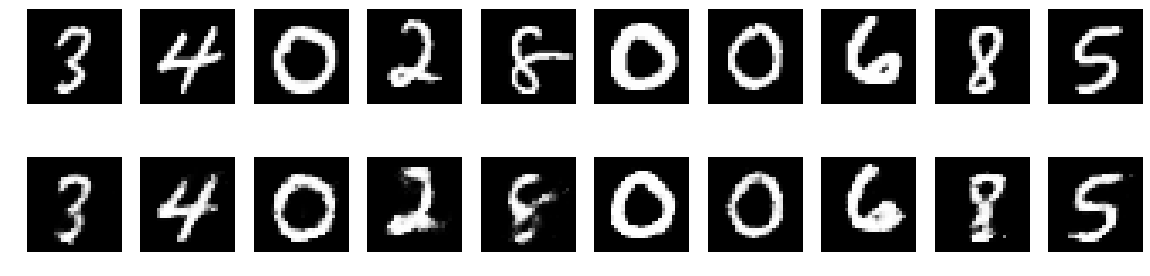

In [10]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### show encodings

In [13]:
import tensorflow.keras.backend as K
l1_output = K.function([model.input, K.learning_phase()], [model.layers[1].output])
X_sample_encoded = l1_output([X_sample,1.])[0]

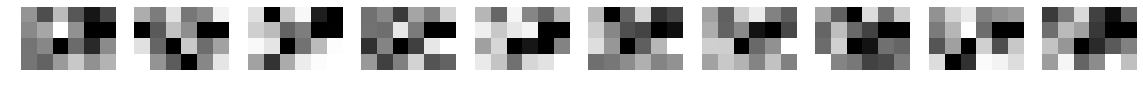

In [14]:
plt.figure(figsize=(20,2))
for i in range(len(X_sample)):
    plt.subplot(1,len(X_sample),i+1)
    plt.imshow(X_sample_encoded[i].reshape(4,-1), cmap=plt.cm.Greys_r)
    plt.axis("off")

# Autoencoder for image denoising

observe reconstruction when fed with noisy data


In [15]:
def add_noise(x, noise_level=.2):
    return x + np.random.normal(size=x.shape)*noise_level

In [16]:
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = model.predict(X_sample_noisy)

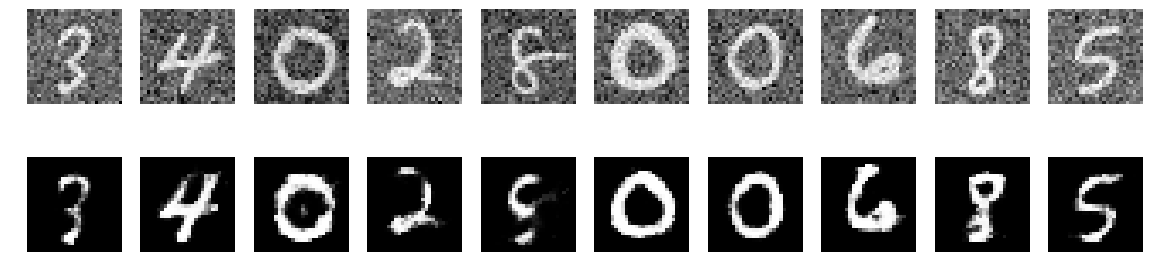

In [17]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

but if we train with noisy data reconstruction improves



In [18]:
n_model = get_model_A(input_dim=X.shape[1], hidden_size=128, code_size=16)
X_train_noisy = add_noise(X_train)

n_model.fit(X_train_noisy, X_train, epochs=100, batch_size=32)

Epoch 1/100
1200/1200 [==============================] - 0s 210us/sample - loss: 0.1287
Epoch 2/100
1200/1200 [==============================] - 0s 82us/sample - loss: 0.0709
Epoch 3/100
1200/1200 [==============================] - 0s 79us/sample - loss: 0.0627
Epoch 4/100
1200/1200 [==============================] - 0s 83us/sample - loss: 0.0534
Epoch 5/100
1200/1200 [==============================] - 0s 100us/sample - loss: 0.0462
Epoch 6/100
1200/1200 [==============================] - 0s 88us/sample - loss: 0.0422
Epoch 7/100
1200/1200 [==============================] - 0s 77us/sample - loss: 0.0395
Epoch 8/100
1200/1200 [==============================] - 0s 81us/sample - loss: 0.0371
Epoch 9/100
1200/1200 [==============================] - 0s 79us/sample - loss: 0.0352
Epoch 10/100
1200/1200 [==============================] - 0s 84us/sample - loss: 0.0335
Epoch 11/100
1200/1200 [==============================] - 0s 85us/sample - loss: 0.0323
Epoch 12/100
1200/1200 [===============

Epoch 94/100
1200/1200 [==============================] - 0s 94us/sample - loss: 0.0134
Epoch 95/100
1200/1200 [==============================] - 0s 97us/sample - loss: 0.0133
Epoch 96/100
1200/1200 [==============================] - 0s 86us/sample - loss: 0.0132
Epoch 97/100
1200/1200 [==============================] - 0s 84us/sample - loss: 0.0132
Epoch 98/100
1200/1200 [==============================] - 0s 86us/sample - loss: 0.0131
Epoch 99/100
1200/1200 [==============================] - 0s 81us/sample - loss: 0.0131
Epoch 100/100
1200/1200 [==============================] - 0s 79us/sample - loss: 0.0131


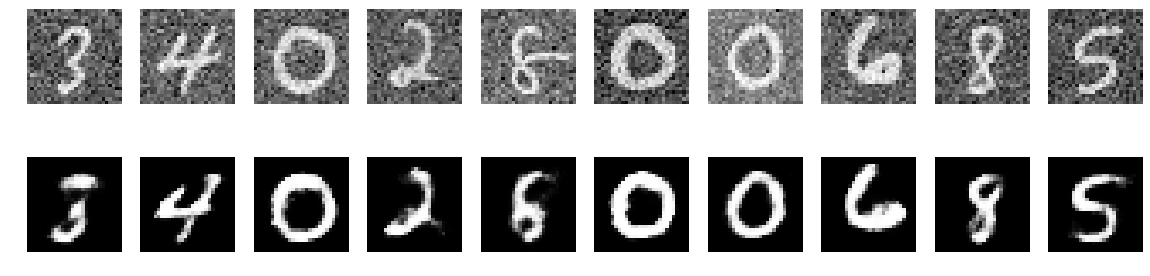

In [20]:
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = n_model.predict(X_sample_noisy)

plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")